## Algoritmo

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

class Grafo:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = [[0] * self.V for _ in range(self.V)]

    # Função auxiliar para verificar se um caminho alternante pode ser encontrado
    def busca_par(self, u, visitado, par):
        for v in range(self.V):
            if self.grafo[u][v] > 0 and not visitado[v]:
                visitado[v] = True

                # Se o vértice não estiver emparelhado ou se um caminho alternante puder ser encontrado
                if par[v] == -1 or self.busca_par(par[v], visitado, par):
                    par[v] = u
                    return True
        return False

    # Função principal que retorna o número máximo de emparelhamentos
    def emparelhamento_maximo(self):
        # Inicialmente, nenhum vértice está emparelhado
        par = [-1] * self.V
        max_emparelhamento = 0

        for u in range(self.V):
            visitado = [False] * self.V

            # Se um caminho alternante for encontrado, incrementa o emparelhamento máximo
            if self.busca_par(u, visitado, par):
                max_emparelhamento += 1

        arestas_emparelhamento = [(u, v) for v, u in enumerate(par) if u != -1]
        return int(max_emparelhamento/2), arestas_emparelhamento           


class Doador:
    def __init__(self, tipo_sangue, fator_rh):
        self.tipo_sangue = tipo_sangue
        self.fator_rh = fator_rh

class Receptor :
    def __init__(self, tipo_sangue, fator_rh):
        self.tipo_sangue = tipo_sangue
        self.fator_rh = fator_rh

# encontra nós e arestas de acordo com lista de doadores e receptores
def add_nos_e_arestas(doadores, receptores, mapping):

    lado_doadores = [] # [[O, A, B, AB]]
    add_nodes_doadores = []
    for d in range(len(doadores)):
        if doadores[d].tipo_sangue == "O":
            lado_doadores.append([1,1,1,1])
        elif doadores[d].tipo_sangue == "A":
            lado_doadores.append([0,1,0,1])
        elif doadores[d].tipo_sangue == "B":
            lado_doadores.append([0,0,1,1])
        elif doadores[d].tipo_sangue == "AB":
            lado_doadores.append([0,0,0,1])
        else:
            print("tipo sanguineo invalido")
            exit(1)
        add_nodes_doadores.append(d)
        mapping[d] = "(" + str(d) + ") " + str(doadores[d].tipo_sangue) + str(doadores[d].fator_rh)

    d += 1
    lado_receptores = [] # [[O, A, B, AB]]
    add_nodes_receptores = []
    for r in range(len(receptores)):
        if receptores[r].tipo_sangue == "O":
            lado_receptores.append([1,0,0,0])
        elif receptores[r].tipo_sangue == "A":
            lado_receptores.append([1,1,0,0])
        elif receptores[r].tipo_sangue == "B":
            lado_receptores.append([1,0,1,0])
        elif receptores[r].tipo_sangue == "AB":
            lado_receptores.append([1,1,1,1])
        else:
            print("tipo sanguineo invalido")
            exit(1)
        add_nodes_receptores.append(r+d)
        mapping[r+d] = "(" + str(r+d) + ") " + str(receptores[r].tipo_sangue) + str(receptores[r].fator_rh)


    add_edges = []
    for i in range(len(lado_doadores)):
        for j in range(len(lado_receptores)):
            if doadores[i].fator_rh == '-' or (doadores[i].fator_rh == "+" and receptores[j].fator_rh == "+"):
                for k in range(4):
                    if lado_doadores[i][k] == 1 and lado_receptores[j][k] == 1:
                        add_edges.append((i, j+d))
                        break

    return (add_nodes_doadores, add_nodes_receptores, add_edges)



## Exemplo 1

nós doadores: [0, 1, 2, 3, 4, 5, 6, 7]
nós receptores: [8, 9, 10, 11, 12, 13, 14, 15]
arestas: [(0, 8), (0, 11), (0, 13), (0, 14), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 8), (2, 14), (3, 8), (3, 9), (3, 14), (3, 15), (4, 13), (4, 14), (5, 12), (5, 13), (5, 14), (5, 15), (6, 14), (7, 14), (7, 15)]


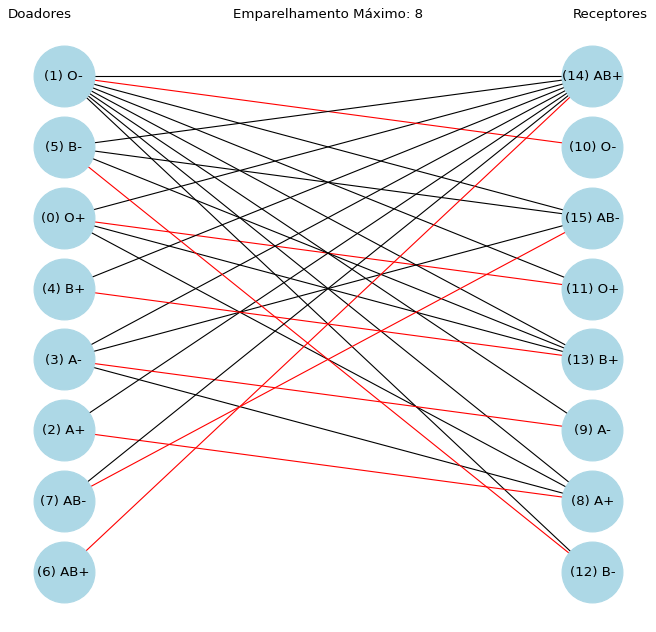

In [65]:
doadores = []
receptores = []
mapping = dict()

doadores.append(Doador("O", "+"))
doadores.append(Doador("O", "-"))
doadores.append(Doador("A", "+"))
doadores.append(Doador("A", "-"))
doadores.append(Doador("B", "+"))
doadores.append(Doador("B", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))

receptores.append(Receptor("A", "+"))
receptores.append(Receptor("A", "-"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))


nodesD, nodesR, arestas = add_nos_e_arestas(doadores, receptores, mapping)

print("nós doadores: "+str(nodesD))
print("nós receptores: "+str(nodesR))
print("arestas: "+str(arestas))

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(nodesD, bipartite=0)
B.add_nodes_from(nodesR, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from(arestas)

# =========================================
grafo = Grafo(len(doadores) + len(receptores))
grafo.grafo = nx.to_numpy_array(B).tolist()

num_max, arestas_emparelhamento = grafo.emparelhamento_maximo()
# =========================================     

# #ffffff00 -> transparente
edge_colors = ['red' if aresta in arestas_emparelhamento else 'black' for aresta in B.edges()]

B = nx.relabel_nodes(B, mapping, copy=True)

esquerda = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
pos = nx.bipartite_layout(B, esquerda)

# Exibe o emparelhamento máximo
plt.figure(num=0, figsize=[8,7.5], frameon=True, clear=False, dpi=80)
nx.draw(B, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color=edge_colors)
plt.title('Doadores', loc='left')
plt.title('Receptores', loc='right')
plt.title("Emparelhamento Máximo: "+ str(num_max))
plt.show()


## Exemplo 2 - somente arestas de emparelhamento

nós doadores: [0, 1, 2, 3, 4, 5, 6, 7]
nós receptores: [8, 9, 10, 11, 12, 13, 14, 15]
arestas: [(0, 8), (0, 11), (0, 13), (0, 14), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 8), (2, 14), (3, 8), (3, 9), (3, 14), (3, 15), (4, 13), (4, 14), (5, 12), (5, 13), (5, 14), (5, 15), (6, 14), (7, 14), (7, 15)]


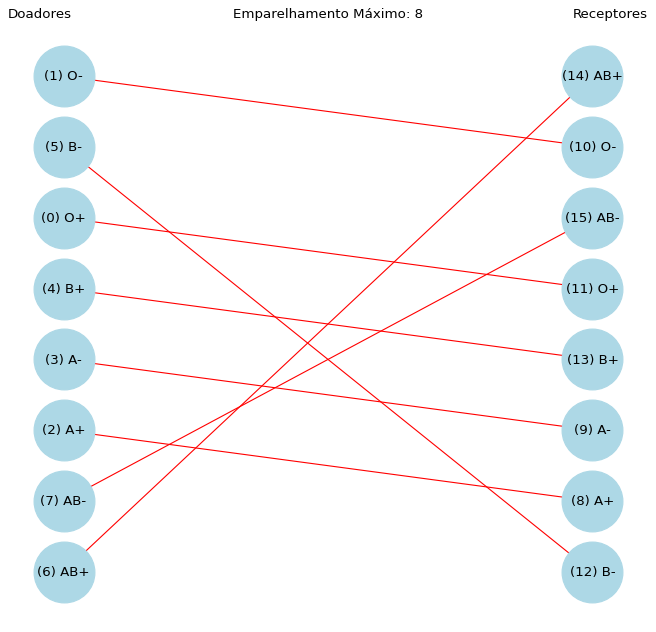

In [66]:
doadores = []
receptores = []
mapping = dict()

doadores.append(Doador("O", "+"))
doadores.append(Doador("O", "-"))
doadores.append(Doador("A", "+"))
doadores.append(Doador("A", "-"))
doadores.append(Doador("B", "+"))
doadores.append(Doador("B", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))

receptores.append(Receptor("A", "+"))
receptores.append(Receptor("A", "-"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))


nodesD, nodesR, arestas = add_nos_e_arestas(doadores, receptores, mapping)

print("nós doadores: "+str(nodesD))
print("nós receptores: "+str(nodesR))
print("arestas: "+str(arestas))

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(nodesD, bipartite=0)
B.add_nodes_from(nodesR, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from(arestas)

# =========================================
grafo = Grafo(len(doadores) + len(receptores))
grafo.grafo = nx.to_numpy_array(B).tolist()

num_max, arestas_emparelhamento = grafo.emparelhamento_maximo()
# =========================================     

# #ffffff00 -> transparente
edge_colors = ['red' if aresta in arestas_emparelhamento else '#ffffff00' for aresta in B.edges()]

B = nx.relabel_nodes(B, mapping, copy=True)

esquerda = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
pos = nx.bipartite_layout(B, esquerda)

# Exibe o emparelhamento máximo
plt.figure(num=0, figsize=[8,7.5], frameon=True, clear=False, dpi=80)
nx.draw(B, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color=edge_colors)
plt.title('Doadores', loc='left')
plt.title('Receptores', loc='right')
plt.title("Emparelhamento Máximo: "+ str(num_max))
plt.show()


## Exemplo 3 - muitos doadores e receptores

nós doadores: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
nós receptores: [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
arestas: [(0, 33), (0, 36), (0, 38), (0, 39), (0, 41), (0, 43), (0, 45), (0, 46), (0, 48), (0, 50), (0, 52), (0, 53), (0, 55), (0, 58), (0, 59), (0, 62), (0, 64), (0, 65), (0, 67), (0, 69), (0, 71), (0, 72), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (2, 33), (2, 39), (2, 41), (2, 46), (2, 48), (2, 53), (2, 55), (2, 59), (2, 65), (2, 67), (2, 72), (3, 33

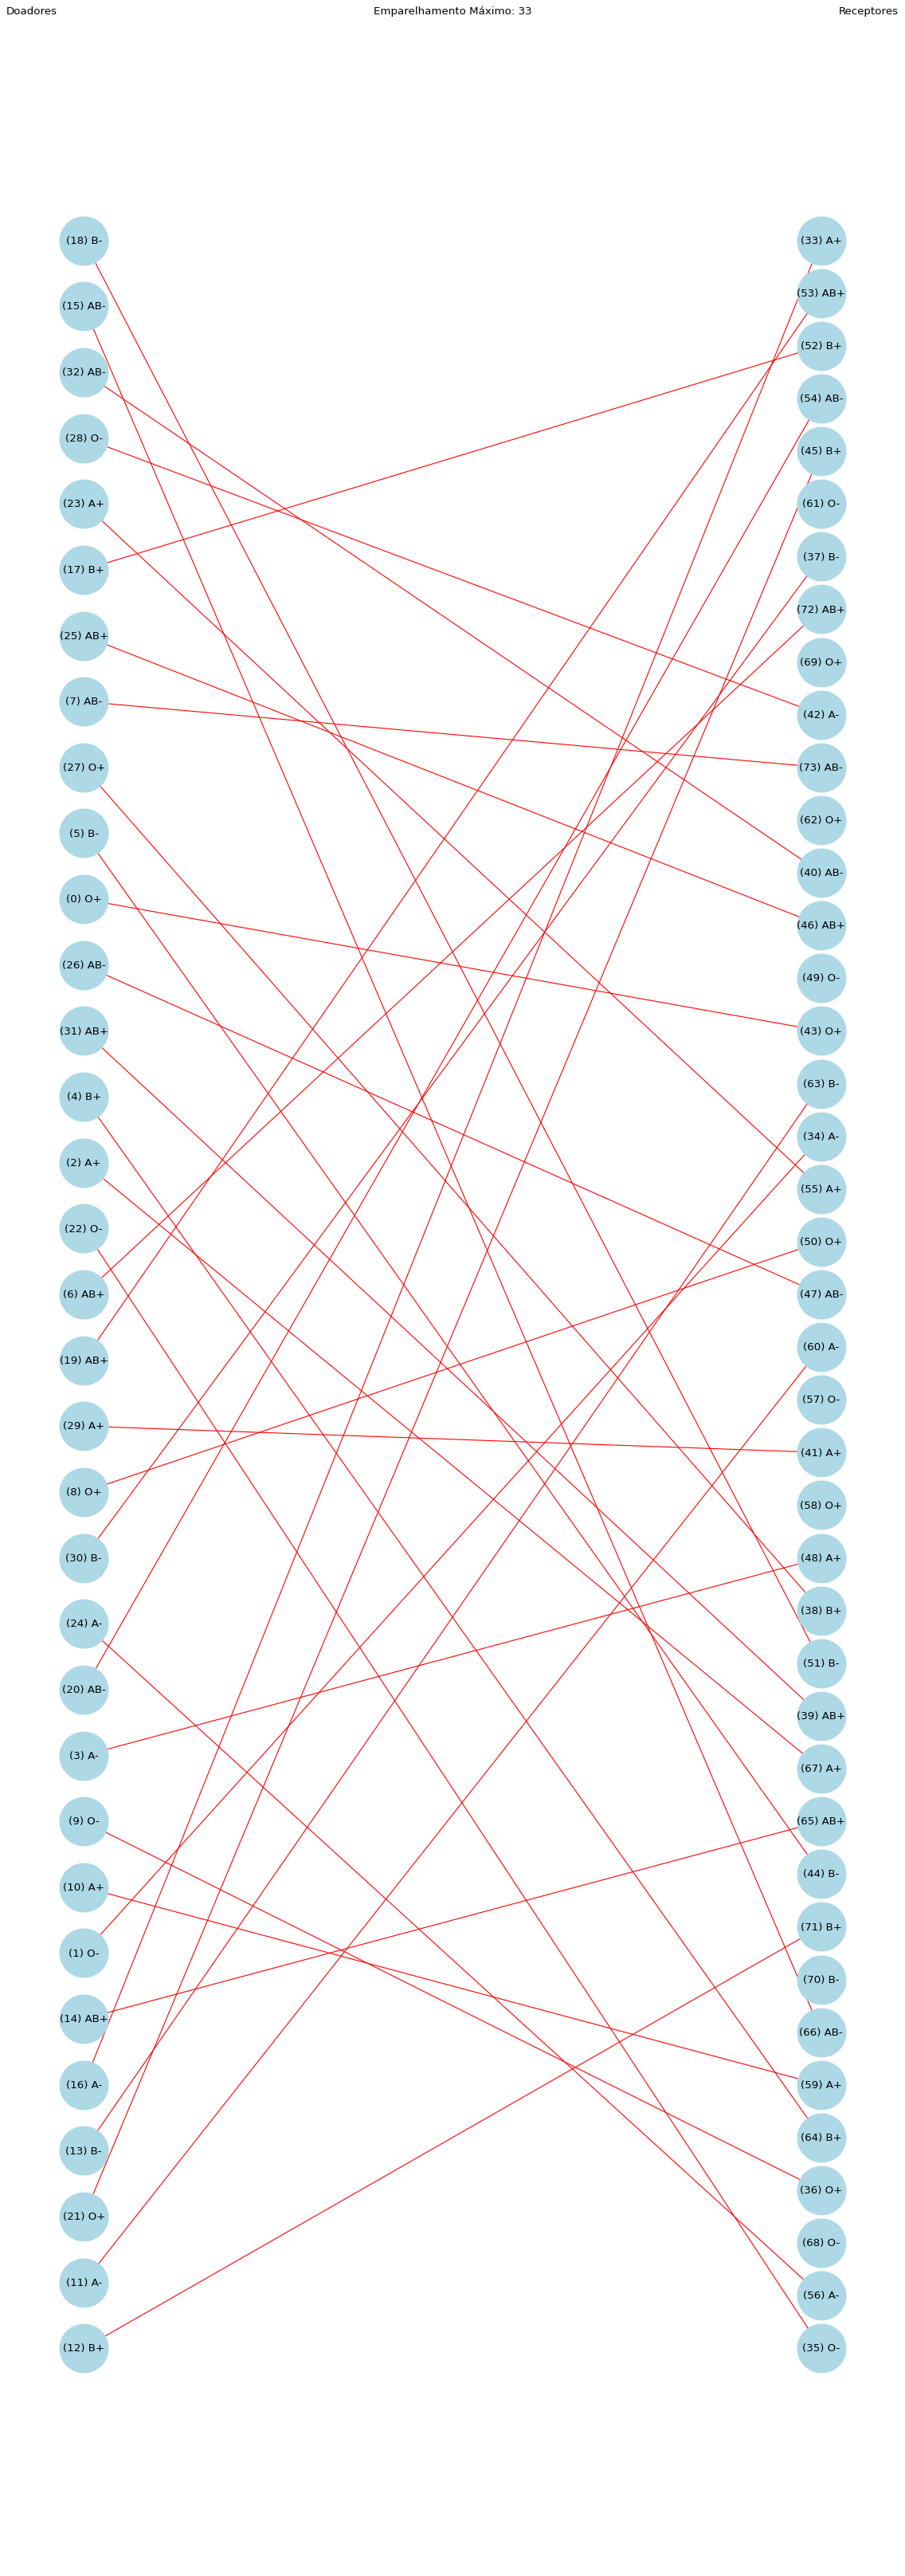

In [67]:
doadores = []
receptores = []
mapping = dict()

doadores.append(Doador("O", "+"))
doadores.append(Doador("O", "-"))
doadores.append(Doador("A", "+"))
doadores.append(Doador("A", "-"))
doadores.append(Doador("B", "+"))
doadores.append(Doador("B", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))
doadores.append(Doador("O", "+"))
doadores.append(Doador("O", "-"))
doadores.append(Doador("A", "+"))
doadores.append(Doador("A", "-"))
doadores.append(Doador("B", "+"))
doadores.append(Doador("B", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))
doadores.append(Doador("A", "-"))
doadores.append(Doador("B", "+"))
doadores.append(Doador("B", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))
doadores.append(Doador("O", "+"))
doadores.append(Doador("O", "-"))
doadores.append(Doador("A", "+"))
doadores.append(Doador("A", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))
doadores.append(Doador("O", "+"))
doadores.append(Doador("O", "-"))
doadores.append(Doador("A", "+"))
doadores.append(Doador("B", "-"))
doadores.append(Doador("AB", "+"))
doadores.append(Doador("AB", "-"))

receptores.append(Receptor("A", "+"))
receptores.append(Receptor("A", "-"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))
receptores.append(Receptor("A", "+"))
receptores.append(Receptor("A", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))
receptores.append(Receptor("A", "+"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))
receptores.append(Receptor("A", "+"))
receptores.append(Receptor("A", "-"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("A", "+"))
receptores.append(Receptor("A", "-"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))
receptores.append(Receptor("A", "+"))
receptores.append(Receptor("O", "-"))
receptores.append(Receptor("O", "+"))
receptores.append(Receptor("B", "-"))
receptores.append(Receptor("B", "+"))
receptores.append(Receptor("AB", "+"))
receptores.append(Receptor("AB", "-"))


nodesD, nodesR, arestas = add_nos_e_arestas(doadores, receptores, mapping)

print("nós doadores: "+str(nodesD))
print("nós receptores: "+str(nodesR))
print("arestas: "+str(arestas))

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(nodesD, bipartite=0)
B.add_nodes_from(nodesR, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from(arestas)

# =========================================
grafo = Grafo(len(doadores) + len(receptores))
grafo.grafo = nx.to_numpy_array(B).tolist()

num_max, arestas_emparelhamento = grafo.emparelhamento_maximo()
# =========================================     

# #ffffff00 -> transparente
edge_colors = ['red' if aresta in arestas_emparelhamento else '#ffffff00' for aresta in B.edges()]

B = nx.relabel_nodes(B, mapping, copy=True)

esquerda = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
pos = nx.bipartite_layout(B, esquerda)

# Exibe o emparelhamento máximo
plt.figure(num=0, figsize=[14,40], frameon=True, clear=False, dpi=80)
nx.draw(B, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color=edge_colors)
plt.title('Doadores', loc='left')
plt.title('Receptores', loc='right')
plt.title("Emparelhamento Máximo: "+ str(num_max))
plt.show()
